<a href="https://colab.research.google.com/github/DaianneS/analiseDeVendaOnlineAtividade5/blob/main/atividade5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Gerador de dados fake

In [1]:
import pandas as pd
import random

# define categorias e produtos
categorias = ['Eletrônicos', 'Vestuário', 'Livraria', 'Alimentos', 'Móveis']
produtos = {
    'Eletrônicos': ['Notebook', 'Celular', 'Tablet', 'Smartwatch', 'Fone de Ouvido'],
    'Vestuário': ['Camiseta', 'Calça', 'Tênis', 'Jaqueta', 'Boné'],
    'Livraria': ['Livro', 'Caderno', 'Caneta', 'Mochila', 'Lápis'],
    'Alimentos': ['Chocolate', 'Café', 'Biscoito', 'Refrigerante', 'Suco'],
    'Móveis': ['Mesa', 'Cadeira', 'Sofá', 'Armário', 'Estante']
}

# gera os dados fictícios
dados = []
for _ in range(100):  # gera 100 registros
    categoria = random.choice(categorias)
    produto = random.choice(produtos[categoria])
    quantidade = random.randint(1, 50)
    preco_unitario = round(random.uniform(10, 3000), 2)
    data_venda = pd.date_range(start='2024-01-01', end='2024-03-30').to_list()
    data_venda = random.choice(data_venda).strftime('%Y-%m-%d')

    dados.append([produto, categoria, quantidade, preco_unitario, data_venda])

# cria o dataframe e salva em .csv
df = pd.DataFrame(dados, columns=['Produto', 'Categoria', 'Quantidade', 'Preco_Unitario', 'Data_Venda'])
df.to_csv('vendas_online.csv', index=False, encoding='utf-8')

print("Arquivo 'vendas_online.csv' criado com sucesso!")

Arquivo 'vendas_online.csv' criado com sucesso!


##Análise

Total de vendas por categoria:
 Categoria
Alimentos      652
Eletrônicos    433
Livraria       515
Móveis         517
Vestuário      407
Name: Quantidade, dtype: int64

Produto mais vendido: Cadeira
Produto menos vendido: Tênis

Receita total: R$ 3,798,041.45
Média de preço dos produtos: R$ 1,548.12


<ipython-input-3-86750019de83>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_categoria.index, y=vendas_categoria.values, palette='viridis', hue=None)


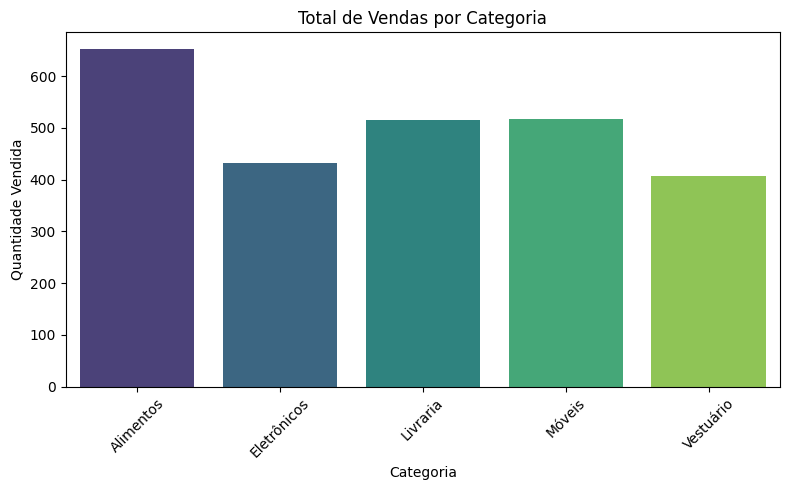

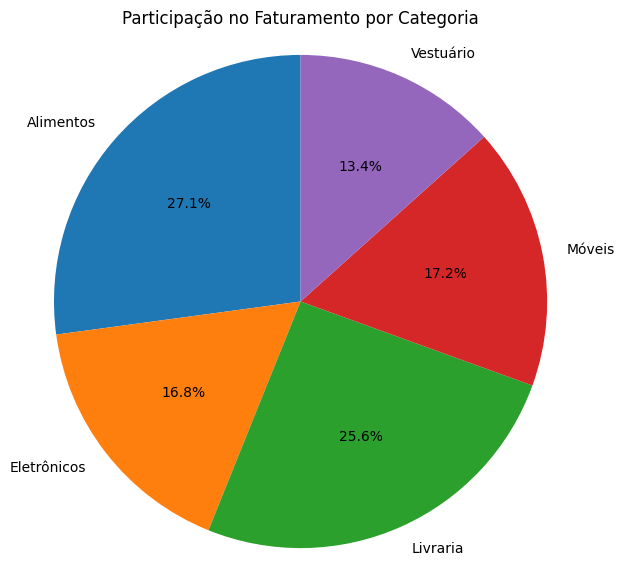

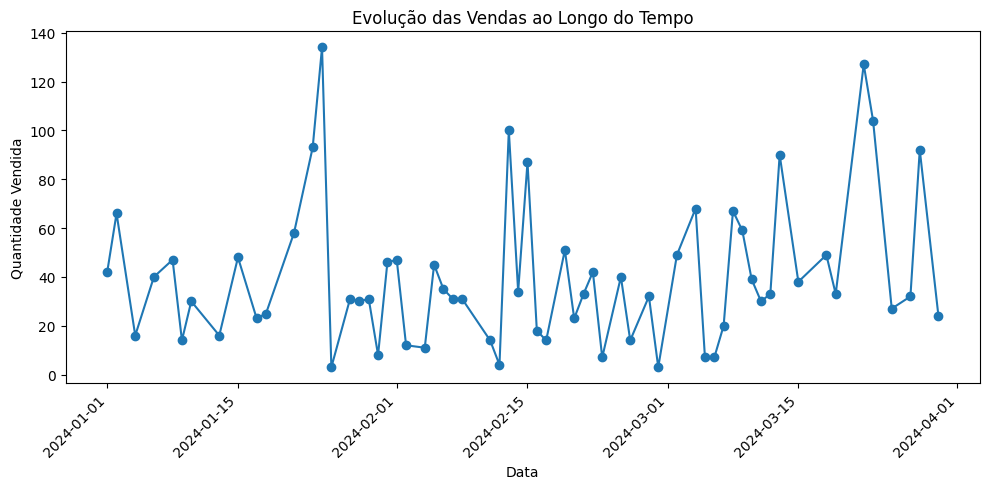

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carrega os dados
df = pd.read_csv('vendas_online.csv')
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])

# Indicadores
vendas_categoria = df.groupby('Categoria')['Quantidade'].sum()
produto_mais_vendido = df.groupby('Produto')['Quantidade'].sum().idxmax()
produto_menos_vendido = df.groupby('Produto')['Quantidade'].sum().idxmin()

df['Receita'] = df['Quantidade'] * df['Preco_Unitario']
receita_total = df['Receita'].sum()
media_preco = df['Preco_Unitario'].mean()

# Exibição dos Indicadores
print("Total de vendas por categoria:\n", vendas_categoria)
print("\nProduto mais vendido:", produto_mais_vendido)
print("Produto menos vendido:", produto_menos_vendido)
print(f"\nReceita total: R$ {receita_total:,.2f}")
print(f"Média de preço dos produtos: R$ {media_preco:,.2f}")

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=vendas_categoria.index, y=vendas_categoria.values, palette='viridis', hue=None)
plt.title('Total de Vendas por Categoria')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de pizza Receita por categoria
receita_por_categoria = df.groupby('Categoria')['Receita'].sum()
plt.figure(figsize=(7, 7))
plt.pie(receita_por_categoria, labels=receita_por_categoria.index, autopct='%1.1f%%', startangle=90)
plt.title('Participação no Faturamento por Categoria')
plt.axis('equal')
plt.show()

# Gráfico de linha Evolução das vendas
vendas_diarias = df.groupby('Data_Venda')['Quantidade'].sum()
plt.figure(figsize=(10, 5))
vendas_diarias.plot(marker='o', linestyle='-')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()